In [1]:
%run -i 'cosim_import.py'

0.post4538.dev0+g17ad4bb
2.8.0


In [2]:
ict = True
ecc = True
agc = True
caseH = 18

In [3]:
ss1 = ev_ssm(ts=caseH, N=50000, step=1, tp=40,
             lr=0.1, lp=60, seed=2022, name="EVA",
             n_pref=1, is_report=True,
             tt_mean=0.3, tt_var=0.01, tt_lb=0, tt_ub=0.6,
             ict=True, ecc=ecc, agc=agc)
ss2 = ev_ssm(ts=caseH, N=50000, step=1, tp=40,
             lr=0.1, lp=60, seed=2022, name="EVA",
             n_pref=1, is_report=True,
             tt_mean=0.3, tt_var=0.01, tt_lb=0, tt_ub=0.6,
             ict=False, ecc=ecc, agc=agc)

EVA: ts=18[H], 50000 EVs, Total Q=1250.86 MWh
Online 14477, Q=362.27 MWh, SoC=0.7435
Power(MW): Pt=-39.0266, Pc=-39.0266, Pd=0.0
Ctrl: 0=7897; 1=6580; 
EVA: ts=18[H], 50000 EVs, Total Q=1250.86 MWh
Online 14477, Q=362.27 MWh, SoC=0.7435
Power(MW): Pt=-39.0266, Pc=-39.0266, Pd=0.0
Ctrl: 0=7897; 1=6580; 


In [ ]:
# set0 = set(self.ev.index)
# set1 = set(self.ev[(self.ev['tf'] <= self.data['ts'])].index)
# set2 = set(self.ev[(self.ev['ts'] >= self.data['ts'] + self.config['t_dur'])].index)
# set_in = set0 - set1 - set2
# self.ev = self.ev.iloc[list(set_in)].reset_index(drop=True)

<AxesSubplot:>

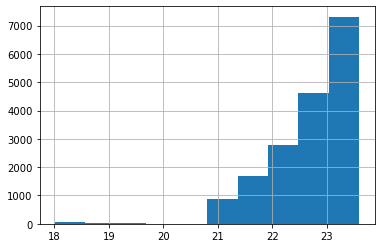

In [5]:
cond = (ss1.ev['tf'] >= ss1.data['ts']) & (ss1.ev['ts'] <= ss1.data['ts'] + ss1.config['t_dur'])
ss1.ev['tf'][cond].hist()

In [8]:
ss1.ev['tf'][cond].shape

(17373,)

In [7]:
ss1.ev.shape

(50000, 28)

In [ ]:
# x10 = ss1.x0.copy()
# x20 = ss2.x0.copy()

# u1, v1, us1, vs1, usp1, vsp1, Pi_cap1, error1 = ss1.r_agc(20)
# u2, v2, us2, vs2, usp2, vsp2, Pi_cap2, error2 = ss2.r_agc(20)

# x11 = ss1.x0.copy()
# x21 = ss2.x0.copy()

# dx1 = x11 - x10
# dx2 = x21 - x20

In [ ]:
# f1, ax = plt.subplots(1, 1, figsize=(15, 5))
# ax.bar(x=range(60), height=dx1, label='dx1', alpha=1, color='tab:green')
# ax.bar(x=range(60), height=dx2, label='dx2', alpha=0.5, color='tab:blue')
# ax.grid()
# ax.set_xlim([0, 60])

In [ ]:
ss1.run(tf=caseH+4/3600, Pi=50,
        is_updateA=False, is_rstate=True,
        is_test=False, disable=True)
ss2.run(tf=caseH+4/3600, Pi=50,
        is_updateA=False, is_rstate=True,
        is_test=False, disable=True)

In [ ]:
ss1.plot_agc()

In [ ]:
ss2.plot_agc()

plt.style.use('science')
%run -i 'cosim_plotev.py'